### In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
nba_df=pd.read_csv("nba_2013.csv")
nba_df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


Here are some selected columns from the data:
- player - name of the player
- pos - the position of the player
- g - number of games the player was in
- gs - number of games the player started
- pts - total points the player scored

In [3]:
nba_df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [4]:
#Let's check for the missing values

nba_df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

Let's fill the missing values in the respective columns

In [5]:
nba_df["fg."].fillna(nba_df["fg."].mean(),inplace=True)
nba_df["x2p."].fillna(nba_df["x2p."].mean(),inplace=True)
nba_df["efg."].fillna(nba_df["efg."].mean(),inplace=True)
nba_df["x3p."].fillna(nba_df["x3p."].mean(),inplace=True)
nba_df["ft."].fillna(nba_df["ft."].mean(),inplace=True)

In [6]:
nba_df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

#### Categorical columns 



In [7]:
nba_df_cat = nba_df[['player', 'bref_team_id', 'season']]

#nba_df_cat = list(set(nba_df.columns) - set(nba_df._get_numeric_data().columns))
nba_df_cat

,player,bref_team_id,season
0,Quincy Acy,TOT,2013-2014
1,Steven Adams,OKC,2013-2014
2,Jeff Adrien,TOT,2013-2014
3,Arron Afflalo,ORL,2013-2014
4,Alexis Ajinca,NOP,2013-2014
...,...,...,...
476,Tony Wroten,PHI,2013-2014
477,Nick Young,LAL,2013-2014
478,Thaddeus Young,PHI,2013-2014
479,Cody Zeller,CHA,2013-2014


#### Numerical columns

In [8]:
nba_df_num = list(nba_df._get_numeric_data().columns)
nba_df_num 

['age',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg.',
 'x3p',
 'x3pa',
 'x3p.',
 'x2p',
 'x2pa',
 'x2p.',
 'efg.',
 'ft',
 'fta',
 'ft.',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'season_end']

In [9]:
nba_num_col = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_num = nba_df[nba_num_col]

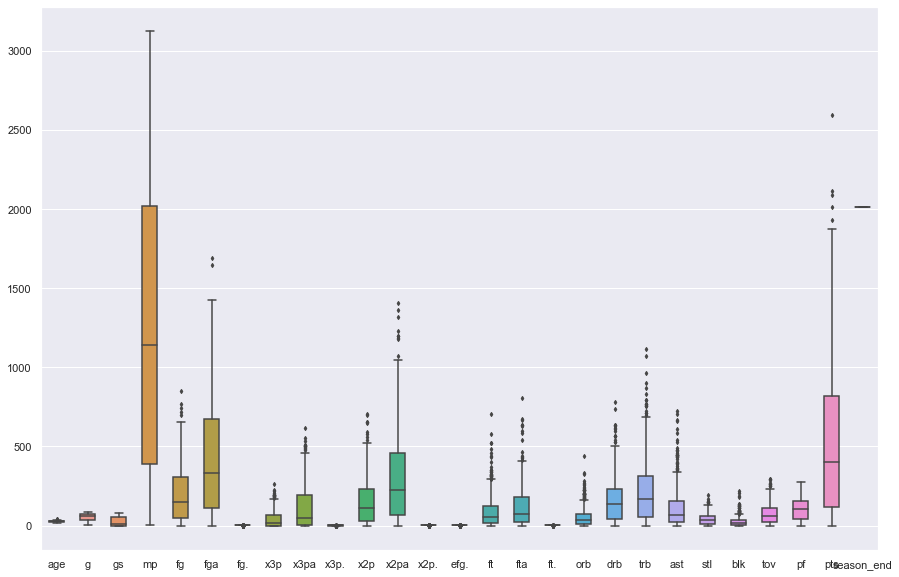

In [10]:
#Let's check for the presence of outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba_df, width= 0.5,ax=ax,  fliersize=3)


'Draw the heatmap with the mask and correct aspect ratio'

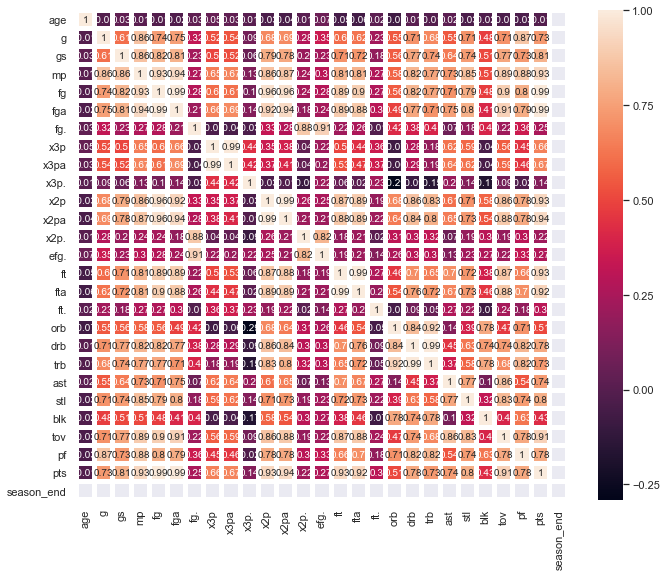

In [11]:
#Let's now create a correlation matrix that measures the linear relationships between the variables. 
correlation_matrix = nba_df.corr().round(2)
# annot = True to print the values inside the square
f , ax = plt.subplots(figsize=(11,9))
sns.heatmap(data=correlation_matrix, annot=True, linewidths = 4)
"""Draw the heatmap with the mask and correct aspect ratio"""
#sns.heatmap(corr , mask = mask , cmap=cmap , vmax=.3, center=0 , annot=True,
 #          square = True , linewidths=5 , cbar_kws={'shrink':.5});


#### Normalize all the numerical columns

In [12]:
nba_df_normalized = nba_num.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
nba_df_normalized

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114,0.362129
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429,0.441188
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220,0.546471
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711,0.188970


In [13]:
nba = pd.concat([nba_df_cat, nba_df_normalized], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

### Creating KNN model using regressor as we have to predict the continuous data i.e. points

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


### We can choose k=8 as it gives the highest prediction score

In [15]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [16]:
y_pred = knn.predict(x_test)
y_pred

array([0.1257231 , 0.29724258, 0.36318936, 0.01108754, 0.37393945,
       0.15913035, 0.09757038, 0.26422098, 0.02998457, 0.01431739,
       0.4231585 , 0.02632086, 0.02892403, 0.01571539, 0.17103741,
       0.70589086, 0.04864057, 0.01195526, 0.47064211, 0.03977054,
       0.08465098, 0.05375048, 0.40749132, 0.44205553, 0.26672773,
       0.04733899, 0.00125337, 0.34381026, 0.47565561, 0.31117432,
       0.04425376, 0.18540301, 0.23303124, 0.12702468, 0.38015812,
       0.60571732, 0.13377362, 0.00115696, 0.01412457, 0.02362129,
       0.26639028, 0.14167952, 0.22107597, 0.00867721, 0.01258195,
       0.15787698, 0.1666506 , 0.03769765, 0.04917084, 0.02391053,
       0.0689356 , 0.22753567, 0.0266101 , 0.34241226, 0.31194562,
       0.02304281, 0.13613575, 0.00115696, 0.17556884, 0.09313536,
       0.01282298, 0.13825685, 0.29608562, 0.13541265, 0.07732356,
       0.30129194, 0.18222137, 0.02347667, 0.17291747, 0.10619938,
       0.330457  , 0.0309005 , 0.0107501 , 0.01417277, 0.11714

In [17]:
knn.score(x_train,y_train)

0.9705041999417812

In [18]:
knn.score(x_test,y_test)

0.9608709080574631

In [19]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


In [20]:
#Let's increase the accuracy by using hyperparameter tuning

param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [21]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [22]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.966, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.942, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.971, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.946, total= 

[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.942, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=11, score=0.953, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=11, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=11 ...............

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.946, total= 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.945, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.967, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.956, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.934, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.953, total=   0.0s
[

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.922, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.956, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.943, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.958, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.966, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.958, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.959, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.961, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.971, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.944, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.975, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.963, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.959, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.938, total=   0.0s


[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.969, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.959, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.939, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.975, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.969, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.959, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.959, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.961, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.951, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.927, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.966, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.942, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.945, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.971, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.965, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.944, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    3.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=8, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [23]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [24]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn1 = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =5)

In [25]:
knn1.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
knn1.score(x_train,y_train)

0.9750977183338924

In [27]:
knn1.score(x_test,y_test)

0.9582816514945678

In [28]:
y_pred1 = knn1.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred1), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred1),'.4f'))

Mean Squared Error is: 0.0011881
Regression score is: 0.9583


In [29]:
Test_With_Predicted1 = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred1.tolist()})

Test_With_Predicted1

,Actual Points,Predicted Points
0,0.168145,0.127497
1,0.276514,0.283687
2,0.422676,0.384882
3,0.007327,0.009179
4,0.381026,0.369842
...,...,...
140,0.426919,0.413189
141,0.013498,0.022137
142,0.312379,0.311300
143,0.306980,0.280293
